In [2]:
#testing
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
#testing
from scipy.integrate import odeint
#odeint?    # Uncomment to view the help file for this function

# Define a function which calculates the derivative
def dy_dx(y, x):
    return x - y

xs = np.linspace(0,5,100)
y0 = 1.0
ys = odeint(dy_dx, y0, xs)
ys = np.array(ys).flatten()

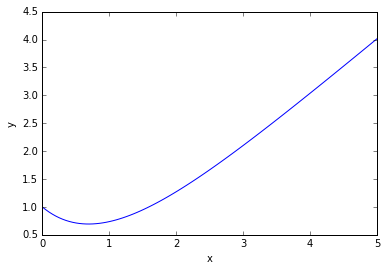

In [4]:
#still testing
plt.plot(xs, ys)
plt.xlabel("x")
plt.ylabel("y");

In [5]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

[[  0.00000000e+00   0.00000000e+00   1.56000000e+07   2.26000000e+16]
 [  1.52992850e+23   5.05910425e+20   1.55998325e+07   2.25992076e+16]
 [  1.22388896e+24   4.04643740e+21   1.55993301e+07   2.25968307e+16]
 ..., 
 [  4.12076663e+30   1.11613931e+27   1.25781163e+07   1.25642420e+14]
 [  4.12375581e+30   1.11616286e+27   1.25781145e+07   1.25361536e+14]
 [  4.12674394e+30   1.11618636e+27   1.25781127e+07   1.25081672e+14]]


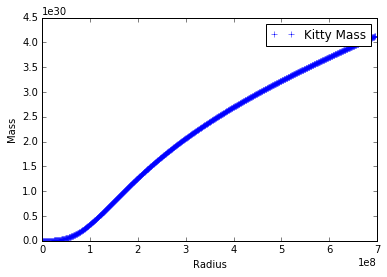

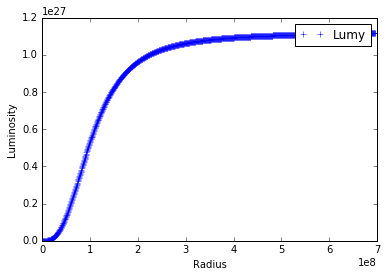

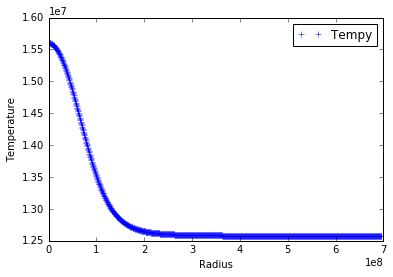

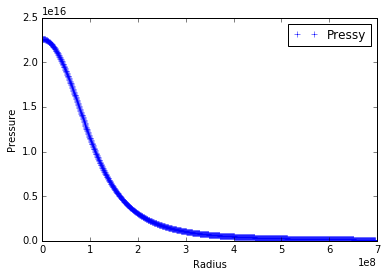

In [14]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
M = 0
L = 0
G = 6.67*(10**-11) #universal g
BC = 1.38*(10**-23) #Boltsman Constant
P = 2.26*(10**16)  #pressure from graph, eye ball it
T = 15.6*(10**6)  #temperature
MH = 1.67*(10**-27) #mass of hydrogen atom
X = .7 #hydrogen density
Y = .28 #helium
Z = .02 #metal
c=3.*(10**8) #speed of light
a=7.565*(10**-16) #radiation constant
meow = (1/((2*X)+((3./4.)*Y)+(0.5*Z))) #mu
Xhi_H = .64
Xhi_CNO = .014
gbf = 1.0
gff = 1.9
guil = 10.0 # is the guillotine factor
R_S = 6.957*(10**8)  # radius of sun
L_S = 3.846*(10**26) #luminosity of sun
M_S = 2.0*(10**30) #mass of sun
e_pp = 1.08*(10**-12)
e_cno = 8.24*(10**-31)

def rho(y):    
    Mr, Lr, T, P = y
    return(P - (a*np.power(T,4.)/3.))*((meow*MH)/(BC*T))

def kappa(y):
    Mr, Lr, T, P = y
    rho_0 = rho(y)
    kappa_bf = (4.34*(10**21))*(gbf/guil)*Z*(1.+X) *(rho_0/np.power(T,3.5))
    kappa_ff = (3.68*(10**18))*(1.-Z)*(1.+X)*(rho_0/np.power(T,3.5))
    k_e = .02 * (1.+X)
    return ((kappa_bf+kappa_ff+k_e)/3.)
        
def Eps(y):
    Mr, Lr, T, P = y
    rho_0 = rho(y)
    Eps_pp = (e_pp)*rho_0*np.power(Xhi_H,2.0)*np.power((T/(10*(10**5))),4.)
    Eps_cno = (e_cno)*rho_0*.64*.015*np.power((T/(10*(10**5))),19.9)
    return Eps_pp + Eps_cno

def dMdr(y,r):
    Mr, Lr, T, P = y
    rho_0 = rho(y)
    dmdr_0 = 4.0 * np.pi * np.power(r,2.) * rho_0
    return dmdr_0

def dLdr(y,r):
    Mr, Lr, T, P = y
    Ldr0 = 4.0*np.pi*np.power(r,2.)*rho(y)*Eps(y)
    return Ldr0

def Tempy(y,r):
    Mr, Lr, T, P = y
    rho_0 = rho(y)
    kappa_0 = kappa(y)
    return -(3./(4.*a*c))*(kappa_0*rho_0/np.power(T,3.))*(Lr/(4.*np.pi*np.power(r,2.0)))
   
def Pressy(y,r):
    Mr, Lr, T, P = y
    Pressy0 = -(G*Mr*rho(y))/np.power(r,2.)
    return Pressy0


def derivatives(y,r):
    Mr, Lr, T, P = y
    derivs = [dMdr(y,r), dLdr(y,r), Tempy(y,r), Pressy(y,r)]
    return derivs

y0 = [M, L, T, P]



r = np.linspace(0.1, 6.957*(10**8), 1000)
psoln = odeint(derivatives, y0, r)

print psoln

plt.plot(r, psoln[:,0], "+", label="Kitty Mass")
plt.xlabel("Radius")
plt.ylabel("Mass")
plt.legend();

plt.show()

plt.plot(r, psoln[:,1], "+", label="Lumy")
plt.xlabel("Radius")
plt.ylabel("Luminosity")
plt.legend();

plt.show()

plt.plot(r, psoln[:,2], "+", label="Tempy")
plt.xlabel("Radius")
plt.ylabel("Temperature")
plt.legend();

plt.show()

plt.plot(r, psoln[:,3], "+", label="Pressy")
plt.xlabel("Radius")
plt.ylabel("Pressure")
plt.legend();


In [2]:
#the code above is the one im using
# WARNING
#ignore this code, it gave me wierd stuff


import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
M = 0
L = 0
G = 6.67*(10**-11) #universal g
BC = 1.38*(10**-23) #Boltsman Constant
P = 2.26*(10**16)  #pressure from graph, eye ball it
T = 15.6*(10**6)  #temperature
MH = 1.67*(10**-27) #mass of hydrogen atom
X = .7 #hydrogen density
Y = .28 #helium
Z = .02 #metal
t = 1 #t is the guillotine factor
c=3.*(10**8) #speed of light
a=7.565*(10**-16) #radiation constant
meow = (1/((2*X)+((3./4.)*Y)+(0.5*Z)))
print meow
#finding rho
def rho(y):
    Mr,P,Lr,T = y
    return ((P-((1./3.)*a*np.power(1,4)*meow))/(BC*T))

print rho

def rho(y,r):
    Mr,P,Lr,T = y
    rho1=((P-((1./3.)*a*np.power(1,4)*meow))/(BC*T))
    return rho1

#finding kappa
#g1=1.
#g2=1.
#g3=1.
      
#k1=(4.3*(10**25)*g1*Z*(1.+X)*rho)/(t*(T**3.5))
#k2=((10**24)*Z*rho)/(T**3.5)
#k3=(3.7E22*g3*Z*(1.-Z)*(1.+X)*rho)/((T**3.5))
#kappa = (k2+k1+k3)

def kappa(y,r):
    kappa_bf = (4.34e25)*Z*(1+X) *rho * (T)**(-7/2)
    kappa_ff = (3.68e22)(1-Z)*(1+X)*rho*(T)**(-7/2)
    return (kappa_bf + kappa_ff)/2
print kappa

def Eps(y,r):
    Mr,P,Lr,T = y
    Eps_pp = ((1.08*(10**-12))*rho*(.64**2)*((T/10**6.)**4.))
    Eps_cno = ((8.24*(10**-31))*rho*(.64*.015)*((T/10**6.)**19.9))
    return Eps_pp + Eps_cno
print Eps

def T(y,r):
    Mr,P,Lr,T = y
    T_0=-(3*kappa*rho**dLdr)/(4*a*c(T**3.)*4.*np.pi*np.power(r,2))
    return T_0
print T

def dLdr(y,r):
    Ldr0=4.*np.pi*np.power(r,2)*rho*Eps
    return Ldr0
print dLdr

def dMdr(y,r):
    #Mr, Lr, T, P = y
    rho1 = rho(y,r)
    Mr = 4.0 * np.pi * np.power(r,2) * rho1
    return Mr
print Mr
def P(y,r):
    P_0 = -(G*Mr*rho)/r**2.0
    return P_0
print P

def derivatives(y,r):
    Mr, P, Lr, T = y
    derivs = [dMdr(y,r), P(y,r), dLdr(y,r), T(y,r)]
    return derivs
print derivatives

y0 = [0.0, P, 0.0, T]

#Radius_Range = np.linspace(0.0, 6.957e8, 1000)
#Initial_Conditions_For_y = [0, 1.0]
#psoln = odeint(dMdr, Initial_Conditions_For_y, Radius_Range)
#Mass = psoln(:,0)

#plt.plot(Radius_Range, Mass, "+", label="Mass")
#plt.xlabel("Radius")
#plt.ylabel("Mass")
#plt.legend();


0.617283950617
<function rho at 0x000000000779E978>
<function kappa at 0x000000000779E978>
<function Eps at 0x000000000776BDD8>
<function T at 0x00000000071A4C88>
<function dLdr at 0x000000000779EC88>
0
<function P at 0x000000000779E9E8>
<function derivatives at 0x000000000779E898>
